In [1]:
pip install minisom

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# !pip install minisom
from minisom import MiniSom

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

%matplotlib inline

In [3]:
def som_pie_grid(som, data, labels):
  """Helper to create piechart grid viz
  
  Example: https://raw.githubusercontent.com/JustGlowing/minisom/master/examples/resulting_images/som_iris_pies.png

  :param som: fitted MiniSom instance
  :param data: the data the MiniSom was fit to
  :param labels: an array of labels to use for coloring visual
  """
  labels_map = som.labels_map(data, labels)
  label_names = np.unique(labels)

  plt.figure(figsize=(70, 70))
  the_grid = GridSpec(70, 70)
  for position in labels_map.keys():
      label_fracs = [labels_map[position][lab] for lab in label_names]
      plt.subplot(the_grid[position[1] - 12, position[0]], aspect=1)
      patches, texts = plt.pie(label_fracs)

  plt.show()

  # Cheating way to align legend, create a separate figure just 
  # for legend.  Will have superfluous whitespace below
  plt.legend(patches, label_names, loc='upper left', ncol=5)
  plt.axis('off')
  plt.show()

* Read in the data from `data_url`
* Drop all NAs
* Filter based on the `'Pos'` column to where only have the positions `['C', 'PG', 'SG']` remain
* Drop all non-numeric columns
* Scale the data

In [4]:
data_url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/nba_player_seasons.csv"

In [5]:
df = pd.read_csv(data_url)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Seas    2141 non-null   int64  
 1   Player  2141 non-null   object 
 2   Pos     2141 non-null   object 
 3   Age     2141 non-null   int64  
 4   Tm      2141 non-null   object 
 5   G       2141 non-null   int64  
 6   GS      2141 non-null   int64  
 7   MP      2141 non-null   float64
 8   FG      2141 non-null   float64
 9   FGA     2141 non-null   float64
 10  FG%     2131 non-null   float64
 11  3P      2141 non-null   float64
 12  3PA     2141 non-null   float64
 13  3P%     1967 non-null   float64
 14  2P      2141 non-null   float64
 15  2PA     2141 non-null   float64
 16  2P%     2110 non-null   float64
 17  eFG%    2131 non-null   float64
 18  FT      2141 non-null   float64
 19  FTA     2141 non-null   float64
 20  FT%     2037 non-null   float64
 21  ORB     2141 non-null   float64
 22  

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,0.5,1.0,0.500,0.487,0.4,0.4,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2019,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,0.2,0.3,0.667,0.278,0.7,1.0,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,2019,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,0.4,1.1,0.361,0.459,0.2,0.3,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


In [6]:
df2 = df.dropna()

In [7]:
df3 = df2.loc[df2['Pos'].isin(['C', 'PG', 'SG'])].reset_index(drop=True)

In [8]:
X = df3.select_dtypes(exclude='O')
y = df3['Pos']

In [9]:
scale = StandardScaler()
X_std = scale.fit_transform(X)

* Fit a `MiniSom` instance to the scaled data
  * Choose your own grid size
  * Set a `random_seed` to have reproducible results
  * Initialize the `MiniSom` weight vectors using `.pca_weights_init()` or `.random_weights_init()`
  * Train the model using `.train_random()` or `.train_batch()`

In [10]:
n_cols = X.shape[1]
grid_cols = 10
grid_rows = 10

som = MiniSom(grid_cols,grid_rows, n_cols, random_seed=123)
som.pca_weights_init(X_std)
som.train_random(X_std, num_iteration=1000)

* Use the helper function defined at the top of the notebook to plot the SOM's fit
  * Use the players' positions (the `'Pos'` column) as the labels in the viz
  * Experiment with the SOM's grid size, initialization method, and training method.  Decide a 'good' fit using this visual as guidance.

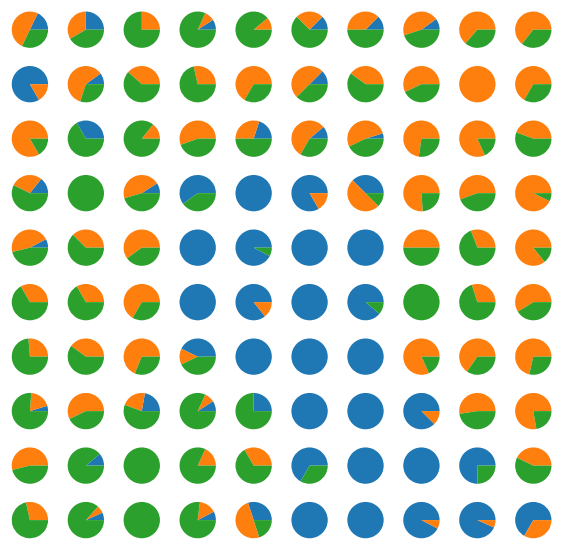

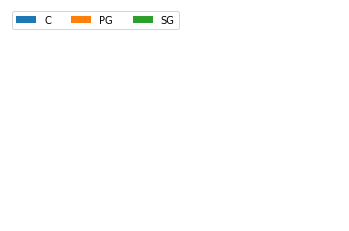

In [11]:
som_pie_grid(som, X_std, y)

* Perform dimension reduction (to 2d) with another method (perhaps `PCA` or `TSNE`).
* Create a scatter plot of the results of this dimension reduction and color the scatter plot by the players' positions (the `'Pos'` column).
  * How do these results compare to that of the SOM? What are the pros and cons of the different approaches you took in this notebook?

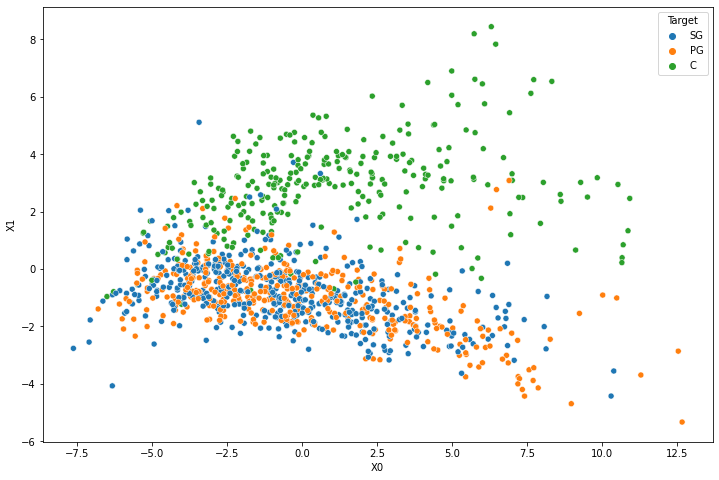

In [13]:
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_std), columns=["X0", "X1"])
X_pca["Target"] = y
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X_pca, x="X0", y="X1", hue="Target")

Both the som and pca seem to seperate the Center position well. Som appears to cluster some SGs better than pca. You do see a couple of som manifolds that seperate SGs from all other positions. Som is slightly better overall than pca at clustering on this particular dataset. 